In [1]:
from ay_torch import *

In [2]:
def Func(x):
  #return (x[:,0]+2.0*x[:,1]).reshape((-1,1))
  #return (x[:,0]*x[:,1]).reshape((-1,1))
  #return (-2.0*x[:,0]**2+0.5*x[:,0]*x[:,1]-x[:,1]**2).reshape((-1,1))
  return (x[:,0]*np.sin(1.0*x[:,1])).reshape((-1,1))
  #return (3.0-(x[:,0]**2+x[:,1]**2)).reshape((-1,1))
  #return (3.0-(x[:,0]**2+np.sin(3.0*x[:,1])**2)).reshape((-1,1))
  #return (np.where(np.sqrt(x[:,0]**2+x[:,1]**2) < 2.0, 5.0, 0.0)).reshape((-1,1))

def GenerateSample(xmin, xmax, N_sample, f, noise=1.0e-10):
  data_x= np.random.uniform(xmin,xmax,size=(N_sample,2))
  data_y= f(data_x) + np.random.normal(scale=noise,size=(N_sample,1))
  return data_x,data_y

In [3]:
xmin,xmax= -5.0, 5.0
#NOTE: Adjust the sample size and noise level.
N_sample= 200
data_x,data_y= GenerateSample(xmin, xmax, N_sample, Func, noise=0.5)

#Convert data to torch variables.
data_x= torch.autograd.Variable(torch.from_numpy(data_x).float())
data_y= torch.autograd.Variable(torch.from_numpy(data_y).float())

#NOTE: Adjust the batch size.
N_batch= 50

#Make torch dataset and loader.
test_ratio= 0.2
idxes= np.random.RandomState(seed=42).permutation(data_x.shape[0])
N_train= round(data_x.shape[0]*(1.-test_ratio))
dset_train= torch.utils.data.TensorDataset(data_x[idxes[:N_train]], data_y[idxes[:N_train]])
dset_test= torch.utils.data.TensorDataset(data_x[idxes[N_train:]], data_y[idxes[N_train:]])
dl_train= torch.utils.data.DataLoader(
      dataset=dset_train,
      batch_size=N_batch,
      shuffle=True,
      num_workers=2)
dl_test= torch.utils.data.DataLoader(
      dataset=dset_train,
      batch_size=N_batch,
      shuffle=True,
      num_workers=2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…
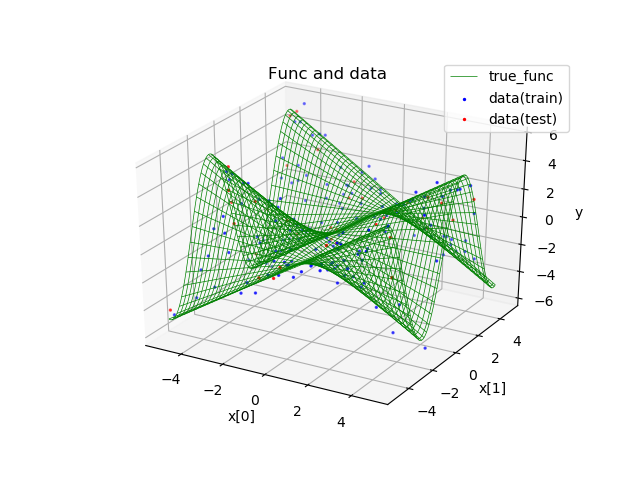

In [4]:
%matplotlib widget
fig= plt.figure()
ax_pred= fig.add_subplot(1,1,1,projection='3d',title='Func and data',xlabel='x[0]',ylabel='x[1]',zlabel='y')
true_x= np.mgrid[xmin:xmax:0.1, xmin:xmax:0.1]
ax_pred.plot_wireframe(true_x[0], true_x[1], Func(true_x[:,:,:].reshape(2,-1).T).reshape(true_x.shape[1:]), color='green', linewidth=0.5, label='true_func')
ax_pred.scatter(data_x[idxes[:N_train],0], data_x[idxes[:N_train],1], data_y[idxes[:N_train]], s=2, color='blue', label='data(train)')
ax_pred.scatter(data_x[idxes[N_train:],0], data_x[idxes[N_train:],1], data_y[idxes[N_train:]], s=2, color='red', label='data(test)')
ax_pred.legend()

In [5]:
class TRegNN1(torch.nn.Module):
  def __init__(self):
    super(TRegNN1,self).__init__()
    self.lin1= torch.nn.Linear(in_features=2, out_features=1, bias=True)
  def forward(self, x):
    x= self.lin1(x)
    return x

def DefRegNN2():
  return torch.nn.Sequential(
          torch.nn.Linear(2, 200),
          torch.nn.LeakyReLU(),
          torch.nn.Linear(200, 100),
          torch.nn.LeakyReLU(),
          torch.nn.Linear(100, 1),
          )

def DefRegNN3():
  return torch.nn.Sequential(
          torch.nn.Linear(2, 200),
          torch.nn.ReLU(),
          torch.nn.Linear(200, 1),
          )

def DefRegNN4():
  return torch.nn.Sequential(
          torch.nn.Linear(2, 200),
          torch.nn.ReLU(),
          torch.nn.Linear(200, 200),
          torch.nn.ReLU(),
          torch.nn.Linear(200, 200),
          torch.nn.ReLU(),
          torch.nn.Linear(200, 200),
          torch.nn.ReLU(),
          torch.nn.Linear(200, 1),
          )

def DefRegNN5(p=0.02):
  return torch.nn.Sequential(
          torch.nn.Linear(2, 200),
          torch.nn.ReLU(),
          torch.nn.Dropout(p),
          torch.nn.Linear(200, 200),
          torch.nn.ReLU(),
          torch.nn.Dropout(p),
          torch.nn.Linear(200, 200),
          torch.nn.ReLU(),
          torch.nn.Dropout(p),
          torch.nn.Linear(200, 200),
          torch.nn.ReLU(),
          torch.nn.Dropout(p),
          torch.nn.Linear(200, 1),
          )

In [6]:
#Setup a neural network.
#net= TRegNN1()
#net= DefRegNN2()
#net= DefRegNN3()
#net= DefRegNN4()
net= DefRegNN5()

device= torch.device('cpu')
# device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
#opt= torch.optim.SGD(net.parameters(), lr=0.004)
#opt= torch.optim.SGD(net.parameters(), lr=0.002, momentum=0.95)
#opt= torch.optim.Adadelta(net.parameters(), rho=0.9, eps=1e-8)
#opt= torch.optim.Adagrad(net.parameters())
#opt= torch.optim.RMSprop(net.parameters())
f_loss= torch.nn.MSELoss()
#f_loss= torch.nn.HuberLoss(reduction='mean', delta=0.1)

def decode(pred):
  return pred

def rmse(y,y_trg):
  return torch.sqrt(torch.nn.functional.mse_loss(y,y_trg))
f_metric= rmse

def tfm_batch(batch):
  x,y= batch
  return torch.autograd.Variable(x), torch.autograd.Variable(y)
logger= TLogger()
disp= TDisp()

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…
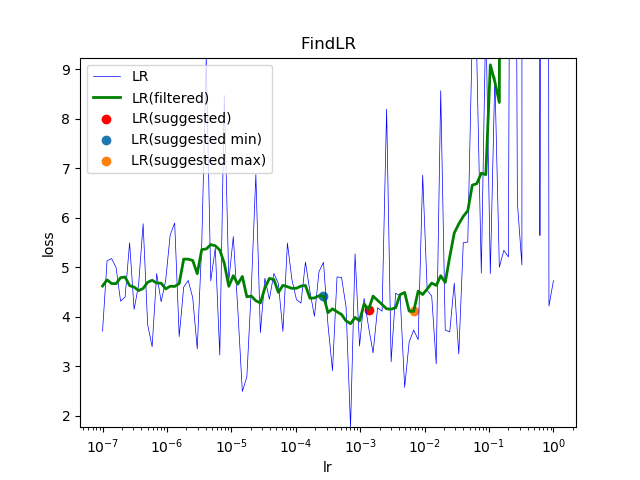

lr= 0.0013489628825916527, lr_min=0.0002691534803926915, lr_max=0.0067608297539198114


In [7]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

loss(train)	loss(test)	metric(test)	time
0.35107724	0.27168431	0.52062012	0.141838
0.31539422	0.30077127	0.54577261	0.102054
0.45139927	0.26044507	0.50810257	0.120799
0.36528503	0.25797927	0.50328625	0.121516
0.38189013	0.54890300	0.73710375	0.122742
0.70773803	0.61272167	0.77938706	0.131598
0.79368455	0.71399026	0.84143318	0.072982
0.87073964	0.69832350	0.83094521	0.129433
0.73026285	0.82902706	0.89243485	0.118995
0.94915049	0.43002719	0.65156111	0.121113
0.76169369	0.65238465	0.78872599	0.081256
0.80878946	0.63415201	0.78497778	0.130630
0.61347868	0.42068280	0.64598392	0.125446
0.40948685	0.35213023	0.58473655	0.112484
0.37896600	0.30933397	0.55597846	0.115425
0.37512045	0.25884583	0.50642460	0.100143
0.36425939	0.26492008	0.51386904	0.120998
0.31287921	0.25997058	0.50881538	0.118973
0.27708171	0.27827255	0.52437960	0.113279
0.26739663	0.27989440	0.52609874	0.111914


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…
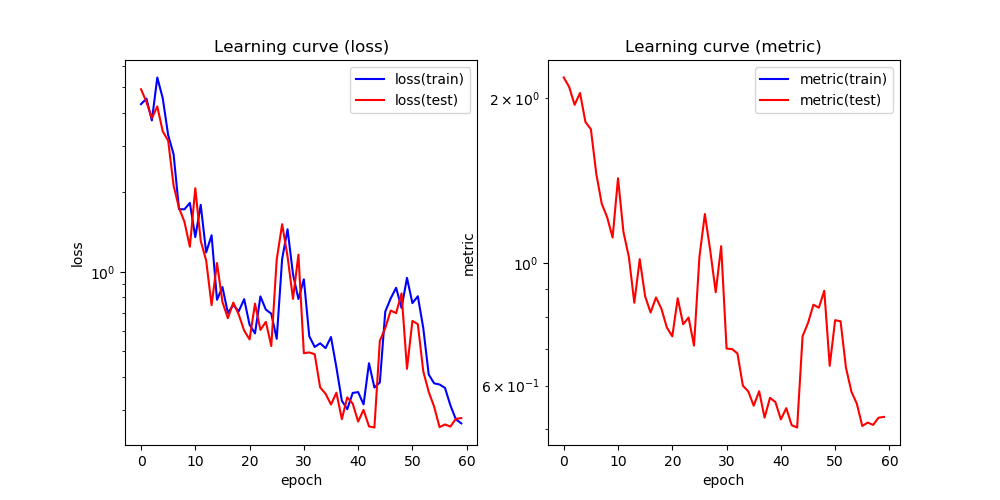

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…
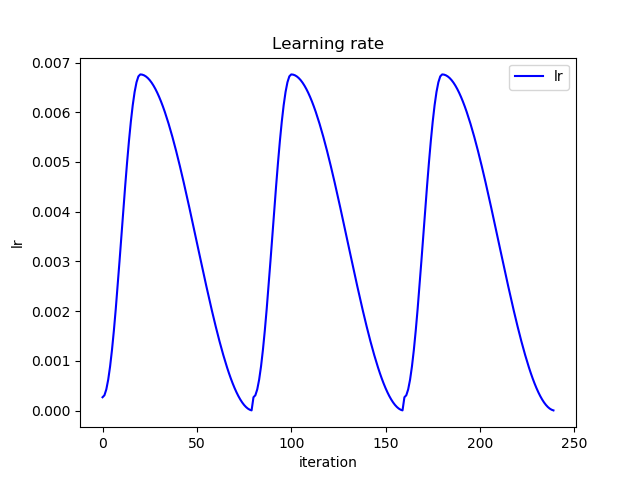

In [11]:
FitOneCycle(net, n_epoch=20, lr_max=lr_max, div_init=lr_max/lr_min, 
    opt=opt, f_loss=f_loss, f_metric=f_metric,
    dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
    callbacks=(logger.Callbacks(),disp.Callbacks()),
    device=device)
logger.Plot()
logger.PlotLR()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…
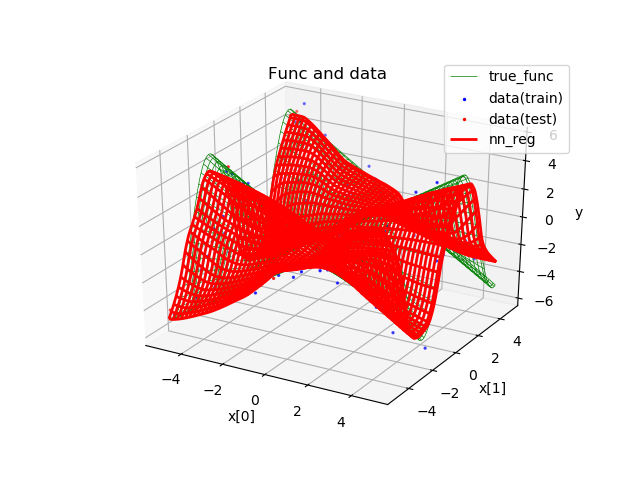

In [12]:
%matplotlib widget
fig= plt.figure()
ax_pred= fig.add_subplot(1,1,1,projection='3d',title='Func and data',xlabel='x[0]',ylabel='x[1]',zlabel='y')
true_x= np.mgrid[xmin:xmax:0.1, xmin:xmax:0.1]
pred_y= decode(Eval(net, torch.from_numpy(true_x[:,:,:].reshape(2,-1).T).float(), device=device)).cpu()
ax_pred.plot_wireframe(true_x[0], true_x[1], Func(true_x[:,:,:].reshape(2,-1).T).reshape(true_x.shape[1:]), color='green', linewidth=0.5, label='true_func')
ax_pred.scatter(data_x[idxes[:N_train],0], data_x[idxes[:N_train],1], data_y[idxes[:N_train]], s=2, color='blue', label='data(train)')
ax_pred.scatter(data_x[idxes[N_train:],0], data_x[idxes[N_train:],1], data_y[idxes[N_train:]], s=2, color='red', label='data(test)')
ax_pred.plot_wireframe(true_x[0], true_x[1], pred_y.data.reshape(true_x.shape[1:]).cpu(), color='red', linewidth=2, label='nn_reg')
ax_pred.legend()